In [13]:
import pandas as pd
from sklearn import tree,metrics
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image

In [14]:
rare_dataSet= pd.read_csv("Final_clean_rare_stones_datasSet.csv",index_col=0)
# rare_df = pd.read_csv("Final_clean_rare_stones.csv",index_col=0)
Climate_df=pd.read_csv("Climate_dictionary.csv",index_col=0)
Group_dict_df = pd.read_csv("Groups_dictionary.csv",index_col=0)
dataset_df = pd.read_csv("Final_clean_dataSet111.csv",index_col=0)
full_df = pd.read_csv("Final_clean_Loc_df111.csv",index_col=0)
Stones_Grouped_df = pd.read_csv("Groups_dictionary.csv",index_col=0)
Stones_appear = pd.read_csv("Stones_Appearence.csv",index_col=0)
Corr_values = pd.read_csv("Corr_values_table.csv",index_col=0)
Corr_names = pd.read_csv("Corr_names_table.csv",index_col=0)
dataset_df.drop("Group_Label",axis=1,inplace=True) 
rare_stone_category=pd.read_csv("rarest_stones_names.csv",index_col=0)
full_df["Climate"] = dataset_df["Climate"]
gemstones_info_df = pd.read_csv("project_data_gemstones_table.csv",index_col=0)

In [15]:
X = dataset_df.copy() #feature matrix

dataset_df["clusters"] = KMeans(n_clusters=8, n_init=500, max_iter=1000).fit_predict(X)
y=dataset_df["clusters"] #################################
full_df["clusters"]=dataset_df["clusters"]

X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1125, 75), (483, 75))

In [16]:
full_df0 = full_df.drop("Group_Label",axis=1).copy()
group0 = full_df0[full_df0["clusters"]==0]
group00 = dataset_df[dataset_df["clusters"]==0]
group1 = full_df0[full_df0["clusters"]==1]
group2 = full_df0[full_df0["clusters"]==2]
group3 = full_df0[full_df0["clusters"]==3]
group4 = full_df0[full_df0["clusters"]==4]

group5 = full_df0[full_df0["clusters"]==5]
group6 = full_df0[full_df0["clusters"]==6]
group7 = full_df0[full_df0["clusters"]==7]
groups = [group0,group1,group2,group3,group4,group5,group6,group7]

In [17]:
# Stones_appear.drop(["Lazuli" ,"Unakite"],axis=1,inplace=True)
Stones_appear = pd.DataFrame(index=range(8),columns=Stones_appear.columns)
Stones_appear["total_stones_in_group"] = 0
for col in Stones_appear.columns:
    Stones_appear[col]=0

In [18]:
for i,group in enumerate(groups):
    for ind in group.index:
        for stone in group["Stone Refernced"][ind].split():
            if(stone=="Lapis" or stone=="Lazuli" or stone=="Unakite"):continue
            Stones_appear[stone][i]+=1
            Stones_appear["total_stones_in_group"][i]+=1

In [19]:
Stones_appear.drop(["Unakite","Lazuli","Lapis"],axis=1,inplace=True)
Stones_appear

Agate  Amazonite  Amethyst  Andalusite  Apatite  Aquamarine  Aventurine  \
0      0          0         6           2       26          12           0   
1      1          2        86          49      206          42           0   
2      1          1        34          12       50          20           0   
3      0          1         4           4       30           8           0   
4      0          0         4           2       29           0           0   
5      1          0        16           9       49          18           2   
6      0          1        10           5       31          22           0   
7      0          7        38           8       50          26           0   

   Azurite  Benitoite  Beryl  ...  Sunstone  Titanite  Topaz  Tourmaline  \
0        3          0     14  ...         0        11      2           0   
1      103          0     82  ...         1       252     31           0   
2       51          1     36  ...         1        36     10           1   
3       15          0     16  ...         0        19      8           0   
4        5          0      5  ...         0        21      5           0   
5       15          0     20  ...         1        37     15           1   
6        7          0     27  ...         0        24     15           1   
7       14          0     44  ...         5        68      7           2   

   Turquoise  Variscite  Wood  Zircon  Zoisite  total_stones_in_group  
0          0          0     3      22        3                    211  
1          9         10     7     186       46                   2348  
2          6          3    12      44       10                    766  
3          3          5     2      24        6                    319  
4          0          1     0      17        5                    191  
5          2          0     1      34        4                    504  
6          0          1     0      27        3                    397  
7          4          4     3      58        5                    861  

[8 rows x 70 columns]

In [20]:
Stones_appear.to_csv("Stones_Clustering_by_KNN")

In [21]:
group0_resaults = Stones_appear.loc[0].sort_values(ascending=False)
group1_resaults = Stones_appear.loc[1].sort_values(ascending=False)
group2_resaults = Stones_appear.loc[2].sort_values(ascending=False)
group3_resaults = Stones_appear.loc[3].sort_values(ascending=False)
group4_resaults = Stones_appear.loc[4].sort_values(ascending=False)
group5_resaults = Stones_appear.loc[5].sort_values(ascending=False)
group6_resaults = Stones_appear.loc[6].sort_values(ascending=False)
group7_resaults = Stones_appear.loc[7].sort_values(ascending=False)

group0_resaults = group0_resaults[group0_resaults.values!=0]
group1_resaults = group1_resaults[group1_resaults.values!=0]
group2_resaults = group2_resaults[group2_resaults.values!=0]
group3_resaults = group3_resaults[group3_resaults.values!=0]
group4_resaults = group4_resaults[group4_resaults.values!=0]
group5_resaults = group5_resaults[group5_resaults.values!=0]
group6_resaults = group6_resaults[group6_resaults.values!=0]
group7_resaults = group7_resaults[group7_resaults.values!=0]
groups_resaults = [group0_resaults,group1_resaults,group2_resaults,group3_resaults,group4_resaults,group5_resaults,group6_resaults,group7_resaults]

In [22]:
group7_resaults

total_stones_in_group    861
Quartz                    92
Smoky                     70
Titanite                  68
Sphene                    68
Zircon                    58
Apatite                   50
Beryl                     44
Diopside                  44
Amethyst                  38
Serpentine                37
Aquamarine                26
Scapolite                 25
Opal                      23
Kyanite                   22
Rose                      18
Spinel                    18
Spodumene                 15
Azurite                   14
Lepidolite                 9
Sodalite                   9
Heliodor                   8
Morganite                  8
Andalusite                 8
Amazonite                  7
Topaz                      7
Rhodochrosite              7
Cordierite                 6
Citrine                    6
Sapphire                   5
Zoisite                    5
Sunstone                   5
Labradorite                5
Turquoise                  4
Variscite     

In [23]:
group0.describe(include="all")

Location URL  \
count                                        53   
unique                                       53   
top     https://www.mindat.org//loc-214610.html   
freq                                          1   
mean                                        NaN   
std                                         NaN   
min                                         NaN   
25%                                         NaN   
50%                                         NaN   
75%                                         NaN   
max                                         NaN   

                                         Stone Refernced Minerals Recorded  \
count                                                 53                10   
unique                                                46                 7   
top     Aquamarine Beryl Aquamarine Lapis Lazuli Unakite               Tin   
freq                                                   4                 3   
mean                                                 NaN               NaN   
std                                                  NaN               NaN   
min                                                  NaN               NaN   
25%                                                  NaN               NaN   
50%                                                  NaN               NaN   
75%                                                  NaN               NaN   
max                                                  NaN               NaN   

                                            Location Name Rock Types  \
count                                                  53         23   
unique                                                 53         18   
top     , Borborema mineral province, Rio Grande do No...  Pegmatite   
freq                                                    1          6   
mean                                                  NaN        NaN   
std                                                   NaN        NaN   
min                                                   NaN        NaN   
25%                                                   NaN        NaN   
50%                                                   NaN        NaN   
75%                                                   NaN        NaN   
max                                                   NaN        NaN   

          Climate  Decimal Coordinates  \
count   53.000000                   53   
unique        NaN                   53   
top           NaN  -13.65000,-40.66667   
freq          NaN                    1   
mean     9.358491                  NaN   
std      6.260666                  NaN   
min      1.000000                  NaN   
25%      6.000000                  NaN   
50%      7.000000                  NaN   
75%     13.000000                  NaN   
max     26.000000                  NaN   

                                                 Minerals   Latitude  \
count                                                  53  53.000000   
unique                                                 53        NaN   
top     Al As Be C Ca Cl Cu F Fe H K Mg Mn Mo O P Pb S...        NaN   
freq                                                    1        NaN   
mean                                                  NaN -20.895355   
std                                                   NaN  16.903475   
min                                                   NaN -74.700000   
25%                                                   NaN -27.815560   
50%                                                   NaN -17.420830   
75%                                                   NaN -10.942910   
max                                                   NaN   5.632360   

         Longitude  ...         Ti    Tl          U          V          W  \
count    53.000000  ...  53.000000  53.0  53.000000  53.000000  53.000000   
unique         NaN  ...        NaN   NaN        NaN        NaN        NaN   
top            NaN 

In [24]:
group1.describe(include='all')

Location URL               Stone Refernced  \
count                                       679                           679   
unique                                      679                           326   
top     https://www.mindat.org//loc-195178.html  Azurite Lapis Lazuli Unakite   
freq                                          1                            47   
mean                                        NaN                           NaN   
std                                         NaN                           NaN   
min                                         NaN                           NaN   
25%                                         NaN                           NaN   
50%                                         NaN                           NaN   
75%                                         NaN                           NaN   
max                                         NaN                           NaN   

       Minerals Recorded                                      Location Name  \
count                 92                                                679   
unique                47                                                679   
top           Aggregates  , Lutynia, Gmina Lądek-Zdrój, Kłodzko County, ...   
freq                  12                                                  1   
mean                 NaN                                                NaN   
std                  NaN                                                NaN   
min                  NaN                                                NaN   
25%                  NaN                                                NaN   
50%                  NaN                                                NaN   
75%                  NaN                                                NaN   
max                  NaN                                                NaN   

       Rock Types     Climate   Decimal Coordinates Minerals    Latitude  \
count         204  679.000000                   679      675  679.000000   
unique        154         NaN                   678      638         NaN   
top     Pegmatite         NaN  31.2612199,35.214581     O Si         NaN   
freq           15         NaN                     2        6         NaN   
mean          NaN    5.083947                   NaN      NaN   48.719148   
std           NaN    5.134218                   NaN      NaN    9.279264   
min           NaN    1.000000                   NaN      NaN    7.495260   
25%           NaN    2.000000                   NaN      NaN   45.383320   
50%           NaN    2.000000                   NaN      NaN   47.676930   
75%           NaN    9.000000                   NaN      NaN   52.068335   
max           NaN   25.000000                   NaN      NaN   79.799840   

         Longitude  ...          Ti          Tl           U           V  \
count   679.000000  ...  679.000000  679.000000  679.000000  679.000000   
unique         NaN  ...         NaN         NaN         NaN         NaN   
top            NaN  ...         NaN         NaN         NaN         NaN   
freq           NaN  ...         NaN         NaN         NaN         NaN   
mean     11.227510  ...    0.650957    0.008837    0.139912    0.072165   
std       9.940358  ...    0.477019    0.093656    0.347151    0.258952   
min     -14.492780  ...    0.000000    0.000000    0.000000    0.000000   
25%       7.142490  ...    0.000000    0.000000    0.000000    0.000000   
50%      10.381910  ...    1.000000    0.000000    0.000000    0.000000   
75%      15.228940  ...    1.000000    0.000000    0.000000    0.000000   
max      51.061020  ...    1.000000    1.000000    1.000000    1.000000   

                 W           Y          Yb          Zn          Zr  clusters  
count   679.000000  679.000000  679.000000  679.000000  679.000000     679.0  
unique         NaN         NaN         NaN         NaN         NaN       NaN  
top            NaN         NaN         NaN         NaN        

In [25]:
group2.describe(include='all')

Location URL               Stone Refernced  \
count                                       261                           261   
unique                                      261                           131   
top     https://www.mindat.org//loc-220197.html  Azurite Lapis Lazuli Unakite   
freq                                          1                            29   
mean                                        NaN                           NaN   
std                                         NaN                           NaN   
min                                         NaN                           NaN   
25%                                         NaN                           NaN   
50%                                         NaN                           NaN   
75%                                         NaN                           NaN   
max                                         NaN                           NaN   

       Minerals Recorded                                      Location Name  \
count                 99                                                261   
unique                79                                                261   
top                 Gold  , Mule Mountains District (Hodges Mountain Dis...   
freq                   5                                                  1   
mean                 NaN                                                NaN   
std                  NaN                                                NaN   
min                  NaN                                                NaN   
25%                  NaN                                                NaN   
50%                  NaN                                                NaN   
75%                  NaN                                                NaN   
max                  NaN                                                NaN   

             Rock Types     Climate  Decimal Coordinates Minerals    Latitude  \
count                91  261.000000                  261      255  261.000000   
unique               75         NaN                  261      247         NaN   
top     Quartzmonzonite         NaN  35.88334,-109.43333   H O Si         NaN   
freq                  4         NaN                    1        4         NaN   
mean                NaN    9.770115                  NaN      NaN   39.069659   
std                 NaN    5.218387                  NaN      NaN    8.236164   
min                 NaN    1.000000                  NaN      NaN   16.883330   
25%                 NaN    4.000000                  NaN      NaN   33.429170   
50%                 NaN   12.000000                  NaN      NaN   37.888610   
75%                 NaN   13.000000                  NaN      NaN   41.220470   
max                 NaN   25.000000                  NaN      NaN   67.061940   

         Longitude  ...          Ti          Tl           U           V  \
count   261.000000  ...  261.000000  261.000000  261.000000  261.000000   
unique         NaN  ...         NaN         NaN         NaN         NaN   
top            NaN  ...         NaN         NaN         NaN         NaN   
freq           NaN  ...         NaN         NaN         NaN         NaN   
mean   -112.783420  ...    0.348659    0.007663    0.118774    0.065134   
std       9.353137  ...    0.477461    0.087369    0.324144    0.247236   
min    -166.854170  ...    0.000000    0.000000    0.000000    0.000000   
25%    -116.948330  ...    0.000000    0.000000    0.000000    0.000000   
50%    -111.829440  ...    0.000000    0.000000    0.000000    0.000000   
75%    -106.363060  ...    1.000000    0.000000    0.000000    0.000000   
max     -93.736110  ...    1.000000    1.000000    1.000000    1.000000   

                 W           Y     Yb          Zn          Zr  clusters  
count   261.000000  261.000000  261.0  261.000000  261.000000     261.0  
unique         NaN         NaN    NaN         NaN         NaN       NaN  
top            Na

In [26]:
group3.describe(include='all')

Location URL               Stone Refernced  \
count                                     102                           102   
unique                                    101                            75   
top     https://www.mindat.org//loc-5885.html  Apatite Lapis Lazuli Unakite   
freq                                        2                             7   
mean                                      NaN                           NaN   
std                                       NaN                           NaN   
min                                       NaN                           NaN   
25%                                       NaN                           NaN   
50%                                       NaN                           NaN   
75%                                       NaN                           NaN   
max                                       NaN                           NaN   

       Minerals Recorded                                      Location Name  \
count                 28                                                102   
unique                16                                                102   
top               Copper  , Mount Brockman, Ashburton Shire, Western Aus...   
freq                   6                                                  1   
mean                 NaN                                                NaN   
std                  NaN                                                NaN   
min                  NaN                                                NaN   
25%                  NaN                                                NaN   
50%                  NaN                                                NaN   
75%                  NaN                                                NaN   
max                  NaN                                                NaN   

       Rock Types     Climate  Decimal Coordinates Minerals    Latitude  \
count          54  102.000000                  102      101  102.000000   
unique         52         NaN                  102       98         NaN   
top      Obsidian         NaN  -43.94545,169.23906   H O Si         NaN   
freq            2         NaN                    1        4         NaN   
mean          NaN    7.019608                  NaN      NaN  -29.315328   
std           NaN    5.020710                  NaN      NaN   10.548926   
min           NaN    1.000000                  NaN      NaN  -75.283330   
25%           NaN    2.000000                  NaN      NaN  -35.647400   
50%           NaN    7.000000                  NaN      NaN  -29.895980   
75%           NaN    9.000000                  NaN      NaN  -23.705920   
max           NaN   19.000000                  NaN      NaN   -2.330250   

         Longitude  ...          Ti     Tl           U           V  \
count   102.000000  ...  102.000000  102.0  102.000000  102.000000   
unique         NaN  ...         NaN    NaN         NaN         NaN   
top            NaN  ...         NaN    NaN         NaN         NaN   
freq           NaN  ...         NaN    NaN         NaN         NaN   
mean    143.127625  ...    0.529412    0.0    0.078431    0.098039   
std      16.633207  ...    0.501599    0.0    0.270177    0.298836   
min     107.731640  ...    0.000000    0.0    0.000000    0.000000   
25%     136.254690  ...    0.000000    0.0    0.000000    0.000000   
50%     144.067980  ...    1.000000    0.0    0.000000    0.000000   
75%     150.738890  ...    1.000000    0.0    0.000000    0.000000   
max     179.958330  ...    1.000000    0.0    1.000000    1.000000   

                 W           Y     Yb          Zn          Zr  clusters  
count   102.000000  102.000000  102.0  102.000000  102.000000     102.0  
unique         NaN         NaN    NaN         NaN         NaN       NaN  
top            NaN         NaN    NaN         NaN         NaN       NaN  
freq           NaN         NaN    NaN         NaN         NaN       NaN  
mean      0.166667    0

In [27]:
group4.describe(include='all')

Location URL  \
count                                        68   
unique                                       68   
top     https://www.mindat.org//loc-123007.html   
freq                                          1   
mean                                        NaN   
std                                         NaN   
min                                         NaN   
25%                                         NaN   
50%                                         NaN   
75%                                         NaN   
max                                         NaN   

                                     Stone Refernced Minerals Recorded  \
count                                             68                15   
unique                                            53                10   
top     Apatite Lapis Lazuli Sphene Titanite Unakite              Gold   
freq                                               4                 2   
mean                                             NaN               NaN   
std                                              NaN               NaN   
min                                              NaN               NaN   
25%                                              NaN               NaN   
50%                                              NaN               NaN   
75%                                              NaN               NaN   
max                                              NaN               NaN   

                                            Location Name Rock Types  \
count                                                  68         43   
unique                                                 68         39   
top     , Lizhou District, Guangyuan, Sichuan, China,i...    Granite   
freq                                                    1          3   
mean                                                  NaN        NaN   
std                                                   NaN        NaN   
min                                                   NaN        NaN   
25%                                                   NaN        NaN   
50%                                                   NaN        NaN   
75%                                                   NaN        NaN   
max                                                   NaN        NaN   

          Climate Decimal Coordinates  \
count   68.000000                  68   
unique        NaN                  68   
top           NaN  40.87694,115.57667   
freq          NaN                   1   
mean     8.014706                 NaN   
std      7.191398                 NaN   
min      1.000000                 NaN   
25%      4.000000                 NaN   
50%      5.000000                 NaN   
75%     10.000000                 NaN   
max     24.000000                 NaN   

                                               Minerals   Latitude  \
count                                                68  68.000000   
unique                                               67        NaN   
top     Valid Species Al Ca Cl F Fe H Na O P S Si Ti Zr        NaN   
freq                                                  2        NaN   
mean                                                NaN  39.803252   
std                                                 NaN  12.051379   
min                                                 NaN  16.262780   
25%                                                 NaN  31.176788   
50%                                                 NaN  36.721530   
75%                                                 NaN  45.649997   
max                                                 NaN  70.880000   

         Longitude  ...         Ti         Tl          U          V  \
count    68.000000  ...  68.000000  68.000000  68.000000  68.000000   
unique         NaN  ...        NaN        NaN        NaN        NaN   
top            NaN  ...        NaN        NaN        NaN        NaN   
freq           NaN  ...        NaN        NaN     

In [28]:
group5.describe(include='all')

Location URL  \
count                                       125   
unique                                      125   
top     https://www.mindat.org//loc-221396.html   
freq                                          1   
mean                                        NaN   
std                                         NaN   
min                                         NaN   
25%                                         NaN   
50%                                         NaN   
75%                                         NaN   
max                                         NaN   

                        Stone Refernced Minerals Recorded  \
count                               125                18   
unique                               96                16   
top     Lapis Lazuli Serpentine Unakite               Tin   
freq                                  5                 2   
mean                                NaN               NaN   
std                                 NaN               NaN   
min                                 NaN               NaN   
25%                                 NaN               NaN   
50%                                 NaN               NaN   
75%                                 NaN               NaN   
max                                 NaN               NaN   

                                            Location Name   Rock Types  \
count                                                 125           57   
unique                                                125           51   
top     , Braldu Valley, Shigar District, Gilgit-Balti...  Lapislazuli   
freq                                                    1            5   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

           Climate Decimal Coordinates  \
count   125.000000                 125   
unique         NaN                 125   
top            NaN   18.70000,81.90833   
freq           NaN                   1   
mean      8.480000                 NaN   
std       6.967204                 NaN   
min       1.000000                 NaN   
25%       3.000000                 NaN   
50%       6.000000                 NaN   
75%      13.000000                 NaN   
max      26.000000                 NaN   

                                                 Minerals    Latitude  \
count                                                 125  125.000000   
unique                                                119         NaN   
top     Valid Species Al Ca Cl F Fe H K Mg Na O P Si T...         NaN   
freq                                                    2         NaN   
mean                                                  NaN   30.223338   
std                                                   NaN   13.749666   
min                                                   NaN   -4.650000   
25%                                                   NaN   22.353610   
50%                                                   NaN   28.000000   
75%                                                   NaN   37.108610   
max                                                   NaN   66.916670   

         Longitude  ...          Ti     Tl           U           V  \
count   125.000000  ...  125.000000  125.0  125.000000  125.000000   
unique         NaN  ...         NaN    NaN         NaN         NaN   
top            NaN  ...         NaN    NaN         NaN         NaN   
freq           NaN  ...         NaN    NaN         NaN         NaN   
mean     82.134699  ...    0.560000    0.0    0.056000    0.024000  

In [29]:
group6.describe(include='all')

Location URL              Stone Refernced  \
count                                     104                          104   
unique                                    103                           85   
top     https://www.mindat.org//loc-4356.html  Lapis Lazuli Unakite Zircon   
freq                                        2                            6   
mean                                      NaN                          NaN   
std                                       NaN                          NaN   
min                                       NaN                          NaN   
25%                                       NaN                          NaN   
50%                                       NaN                          NaN   
75%                                       NaN                          NaN   
max                                       NaN                          NaN   

       Minerals Recorded                                      Location Name  \
count                 25                                                104   
unique                12                                                104   
top            Gemstones  , Windhoek Rural, Khomas Region, Namibia,i,Kar...   
freq                  11                                                  1   
mean                 NaN                                                NaN   
std                  NaN                                                NaN   
min                  NaN                                                NaN   
25%                  NaN                                                NaN   
50%                  NaN                                                NaN   
75%                  NaN                                                NaN   
max                  NaN                                                NaN   

       Rock Types     Climate Decimal Coordinates Minerals    Latitude  \
count          50  104.000000                 104      104  104.000000   
unique         34         NaN                 103      102         NaN   
top     Pegmatite         NaN  -17.01667,32.26667     Al O         NaN   
freq           14         NaN                   2        2         NaN   
mean          NaN    9.942308                 NaN      NaN  -19.690474   
std           NaN    6.588939                 NaN      NaN   17.984814   
min           NaN    2.000000                 NaN      NaN  -72.000000   
25%           NaN    6.000000                 NaN      NaN  -23.454650   
50%           NaN    7.000000                 NaN      NaN  -19.948685   
75%           NaN   17.000000                 NaN      NaN  -11.891670   
max           NaN   26.000000                 NaN      NaN   14.000000   

         Longitude  ...          Ti     Tl           U           V  \
count   104.000000  ...  104.000000  104.0  104.000000  104.000000   
unique         NaN  ...         NaN    NaN         NaN         NaN   
top            NaN  ...         NaN    NaN         NaN         NaN   
freq           NaN  ...         NaN    NaN         NaN         NaN   
mean     29.756632  ...    0.586538    0.0    0.163462    0.038462   
std      13.148660  ...    0.494839    0.0    0.371577    0.193239   
min       0.083330  ...    0.000000    0.0    0.000000    0.000000   
25%      18.164120  ...    0.000000    0.0    0.000000    0.000000   
50%      30.089725  ...    1.000000    0.0    0.000000    0.000000   
75%      37.899372  ...    1.000000    0.0    0.000000    0.000000   
max      72.500000  ...    1.000000    0.0    1.000000    1.000000   

                 W           Y     Yb          Zn          Zr  clusters  
count   104.000000  104.000000  104.0  104.000000  104.000000     104.0  
unique         NaN         NaN    NaN         NaN         NaN       NaN  
top            NaN         NaN    NaN         NaN         NaN       NaN  
freq           NaN         NaN    NaN         NaN         NaN       NaN  
mean      0.067308    0.134615    0.0    0.2211

In [30]:
group7.describe(include='all')

Location URL  \
count                                      216   
unique                                     216   
top     https://www.mindat.org//loc-45313.html   
freq                                         1   
mean                                       NaN   
std                                        NaN   
min                                        NaN   
25%                                        NaN   
50%                                        NaN   
75%                                        NaN   
max                                        NaN   

                             Stone Refernced Minerals Recorded  \
count                                    216                63   
unique                                   145                49   
top     Lapis Lazuli Sphene Titanite Unakite              Mica   
freq                                       8                 4   
mean                                     NaN               NaN   
std                                      NaN               NaN   
min                                      NaN               NaN   
25%                                      NaN               NaN   
50%                                      NaN               NaN   
75%                                      NaN               NaN   
max                                      NaN               NaN   

                                            Location Name Rock Types  \
count                                                 216         44   
unique                                                216         34   
top     , Monmouth Township, Haliburton County, Ontari...  Pegmatite   
freq                                                    1          6   
mean                                                  NaN        NaN   
std                                                   NaN        NaN   
min                                                   NaN        NaN   
25%                                                   NaN        NaN   
50%                                                   NaN        NaN   
75%                                                   NaN        NaN   
max                                                   NaN        NaN   

           Climate Decimal Coordinates                       Minerals  \
count   216.000000                 216                            216   
unique         NaN                 216                            213   
top            NaN  44.31667,-74.48333  Al C Ca Cl F H K Mg O P Si Ti   
freq           NaN                   1                              2   
mean      3.314815                 NaN                            NaN   
std       3.223888                 NaN                            NaN   
min       1.000000                 NaN                            NaN   
25%       1.000000                 NaN                            NaN   
50%       1.000000                 NaN                            NaN   
75%       5.000000                 NaN                            NaN   
max      19.000000                 NaN                            NaN   

          Latitude   Longitude  ...          Ti          Tl           U  \
count   216.000000  216.000000  ...  216.000000  216.000000  216.000000   
unique         NaN         NaN  ...         NaN         NaN         NaN   
top            NaN         NaN  ...         NaN         NaN         NaN   
freq           NaN         NaN  ...         NaN         NaN         NaN   
mean     42.901839  -75.451651  ...    0.680556    0.004630    0.222222   
std       5.310861    7.232726  ...    0.467344    0.068041    0.416705   
min      19.639860  -94.661670  ...    0.000000    0.000000    0.000000   
25%      41.051875  -77.972850  ...    0.000000    0.000000    0.000000   
50%      42.590186  -73.608750  ...    1.000000    0.000000    0.000000   
75%      45.211320  -71.410750  ...    1.000000    0.000000    0.000000   
max      67.399170  -44.152500  ...    1.000000    1.000000    1.000000  

In [31]:
# check most sagnificant Minerals in each group
# i = 0
# for val in (group7.mean()>=0.5):
#     if(val==True):
#         print(i)
#         i+=1
# i=0
# for col in group7.columns:
#     if(i>=10 and i<=15):
#         print(col)
#     i+=1

In [32]:
Climate_df

0
1         Dfb : Warm-summer humid continental climate
2                     Cfb : Temperate oceanic climate
3   Cwa : Monsoon-influenced humid subtropical cli...
4                             Dfc : Subarctic climate
5                     Cfa : Humid subtropical climate
6                          Aw : Tropical savanna, wet
7                BSh : Hot semi-arid (steppe) climate
8                           BWk : Cold desert climate
9                           BWh : Hot deserts climate
10                                        ET : Tundra
11         Dfa : Hot-summer humid continental climate
12            Csb : Warm-summer Mediterranean climate
13              BSk : Cold semi-arid (steppe) climate
14         Dwc : Monsoon-influenced subarctic climate
15             Csa : Hot-summer Mediterranean climate
16          Dsa : Hot, dry-summer continental climate
17                               EF : Ice cap climate
18                      Am : Tropical monsoon climate
19                   Af : Tropical rainforest climate
20                 Dsc : Dry-summer subarctic climate
21  Dwa : Monsoon-influenced hot-summer humid cont...
22  Cwb : Subtropical highland climate or temperat...
23                     Cfc : Subpolar oceanic climate
24  Dwb : Monsoon-influenced warm-summer humid con...
25         Dsb : Warm, dry-summer continental climate
26                  As : Tropical dry savanna climate

In [33]:
### X_test X_train
def machine_learning(X_train, X_test,y_train,y_test,name):
    clf1 = tree.DecisionTreeClassifier(max_depth=10,min_samples_split=10)
    clf2 = RandomForestClassifier(n_estimators=100, max_depth=15,min_samples_split=15)
    clf3 = KNeighborsClassifier(n_neighbors=5)
    print("========================")
    print("===",name,"===")
    algs = ["DT","RandForest","KNN"]
    clfs = [clf1,clf2,clf3]
    for i,clf in enumerate(clfs):
        clf.fit(X_train,y_train)
        print("  ",algs[i])
        print("   ======")
        y_pred = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        print("    accuracy on train data",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train))
        print("    accuracy on test data",metrics.accuracy_score(y_true=y_test,y_pred=y_pred))
        
        #         print(metrics.confusion_matrix(y_test,y_pred))
    print("========================")

In [34]:
def scale_and_split(X):
    X = scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
    return X_train, X_test, y_train, y_test

In [35]:
X = dataset_df.copy() #feature matrix

# dataset_df["clusters"] = KMeans(n_clusters=8, n_init=500, max_iter=1000).fit_predict(X)
y=dataset_df["clusters"] #################################
full_df["clusters"]=dataset_df["clusters"]
X_locations=X.loc[:,'Latitude':'Longitude']
X_climate = pd.DataFrame(X['Climate'])
X_Minerals = X.loc[:,'Ag':'Zr']
X_loc_and_cl = X.loc[:,'Climate':'Longitude']
X_list = [X_locations,X_Minerals,X_climate,X_loc_and_cl]
X_names = ["Locations","Minerals","Climate","Location_and_Climate"]

In [36]:
for i,X in enumerate(X_list):
    X_train, X_test, y_train, y_test = scale_and_split(X)
    machine_learning(X_train, X_test, y_train, y_test,X_names[i])

=== Locations ===
   DT
    accuracy on train data 0.9946666666666667
    accuracy on test data 0.9834368530020704
   RandForest
    accuracy on train data 0.9991111111111111
    accuracy on test data 0.9917184265010351
   KNN
    accuracy on train data 0.992
    accuracy on test data 0.989648033126294
=== Minerals ===
   DT
    accuracy on train data 0.5955555555555555
    accuracy on test data 0.35403726708074534
   RandForest
    accuracy on train data 0.5902222222222222
    accuracy on test data 0.4451345755693582
   KNN
    accuracy on train data 0.56
    accuracy on test data 0.38095238095238093
=== Climate ===
   DT
    accuracy on train data 0.6133333333333333
    accuracy on test data 0.6024844720496895
   RandForest
    accuracy on train data 0.6088888888888889
    accuracy on test data 0.5962732919254659
   KNN
    accuracy on train data 0.5235555555555556
    accuracy on test data 0.494824016563147
=== Location_and_Climate ===
   DT
    accuracy on train data 0.994666666666

# Final model - based on Decision Tree Classifier

# Which Gemstones will you most likely find?

In [37]:
X = dataset_df.copy() #feature matrix

dataset_df["clusters"] = KMeans(n_clusters=8, n_init=500, max_iter=1000).fit_predict(X)
y=dataset_df["clusters"] #################################
full_df["clusters"]=dataset_df["clusters"]

X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1125, 76), (483, 76))

In [38]:
def print_stone_info(stone):
    gemstones_info_df.drop_duplicates(inplace=True)
    for i in gemstones_info_df.index:
        stone_name = gemstones_info_df["Name"][i]
        if(stone==stone_name):
            stone_info = gemstones_info_df.loc[i]
            stone_img = "imagesmindat"+str(stone_name) + ".jpg"
            try:
                img = Image(filename=stone_img,width=100,height=100)
                display(img)
            except FileNotFoundError:
                print("#######",stone_img)
                pass
            print(stone_info)
        
def stone_details(group_num):
    Group = group0_resaults
    if(group_num==1):Group = group1_resaults
    if(group_num==2):Group = group2_resaults
    if(group_num==3):Group = group3_resaults
    if(group_num==4):Group = group4_resaults
    if(group_num==5):Group = group5_resaults
    if(group_num==6):Group = group6_resaults
    if(group_num==7):Group = group7_resaults
    for stone in Group.index:
        if(stone!="total_stones_in_group"): print_stone_info(stone)

Please enter Lat value: 32.72247498268717
Please enter Long value:  35.09698611319979
Closest clusters prediction : 2
would you like to get more details? yes = 1, no =0
o or 1?1


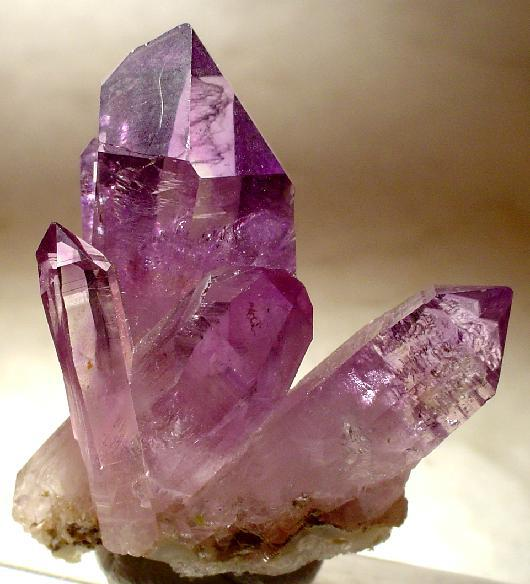

Name                                                        Quartz
Formula                                                       SiO2
Elements                                                    O, Si 
Colours          Colorless, purple, rose, red, black, yellow, b...
Image_url        ['/imagecache/07/5d/04575660014946244507266.jp...
Locations        ['Afghanistan', '\xa0', 'Argentina', '\xa0', '...
Locations_url    ['https://www.mindat.org//loc-226590.html', 'h...
Name: 56, dtype: object


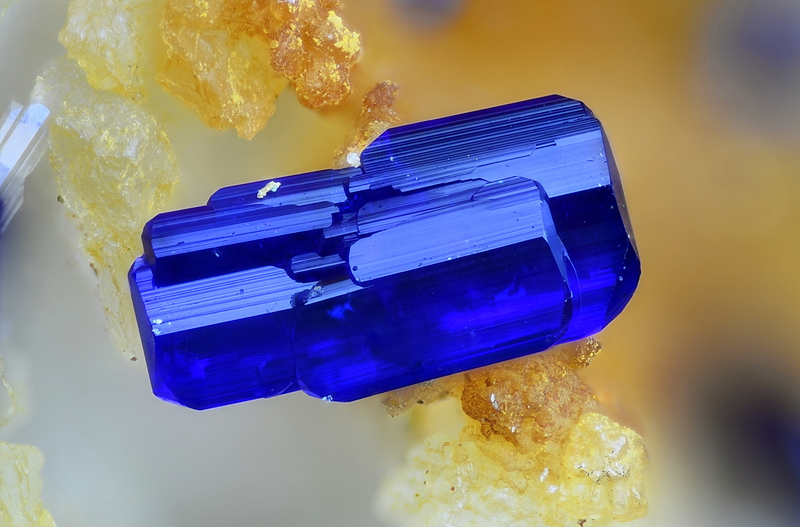

Name                                                       Azurite
Formula                                             Cu3(CO3)2(OH)2
Elements         l amounts in ores of the Leninogorsk mining fi...
Colours          Azure blue, blue, light blue, or dark blue; li...
Image_url        ['/imagecache/1a/7f/03400580015925239993950.jp...
Locations        ['Afghanistan', '\xa0', 'Albania', '\xa0', 'Al...
Locations_url    ['https://www.mindat.org//loc-226638.html', 'h...
Name: 9, dtype: object


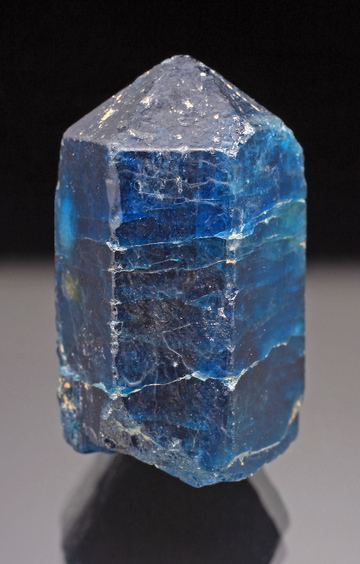

Name                                                       Apatite
Formula                                         Ca5(PO4)3(Cl/F/OH)
Elements                                                  Bonfim W
Colours                                                        NaN
Image_url        ['/imagecache/d4/20/09201900015577822756729.jp...
Locations        ['Afghanistan', '\xa0', 'Africa', '\xa0', 'Alg...
Locations_url    ['https://www.mindat.org//loc-227306.html', 'h...
Name: 6, dtype: object


Name                                                        Zircon
Formula          Zr(SiO4)May contain minor U, Th, Pb, Hf, Y/REE...
Elements         , Pr, Nd, and Sm) from a Carbonatite Deposit: ...
Colours          Colourless, yellow, grey, reddish-brown, green...
Image_url        ['/imagecache/40/37/05576060014946320573225.jp...
Locations        ['Afghanistan', '\xa0', 'Algeria', '\xa0', 'An...
Locations_url    ['https://www.mindat.org//loc-3.html', 'https:...
Name: 89, dtype: object


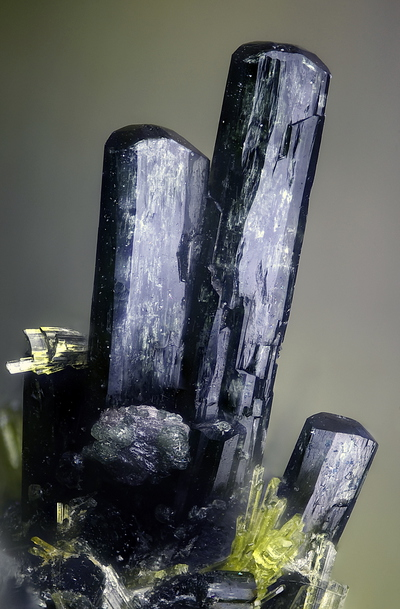

Name                                                      Diopside
Formula                                                  CaMgSi2O6
Elements                                                  Bonfim W
Colours          light to dark green, blue, brown, colourless, ...
Image_url        ['/imagecache/17/b0/01772440015483539858567.jp...
Locations        ['Afghanistan', '\xa0', 'Africa', '\xa0', 'Alg...
Locations_url    ['https://www.mindat.org//loc-251981.html', 'h...
Name: 25, dtype: object


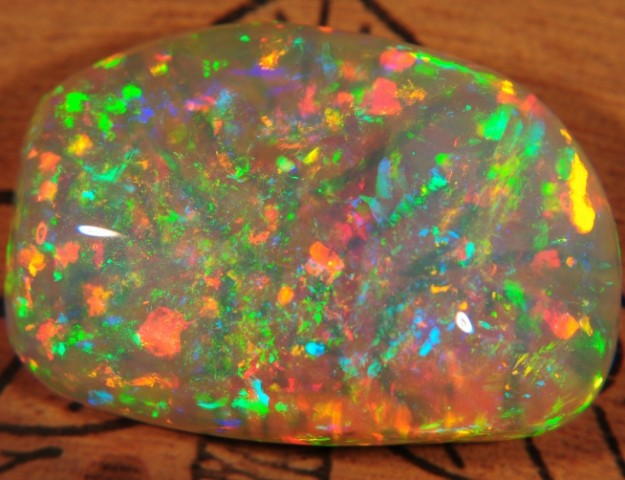

Name                                                          Opal
Formula                         SiO2 · nH2OIMA Formula:SiO2 · nH2O
Elements                           r and Lower Silesian Basin Coal
Colours          Colourless, white, yellow, red, orange, green,...
Image_url        ['/imagecache/91/62/06581350014977243586228.jp...
Locations        ['Afghanistan', '\xa0', 'Algeria', '\xa0', 'An...
Locations_url    ['https://www.mindat.org//loc-227638.html', 'h...
Name: 50, dtype: object


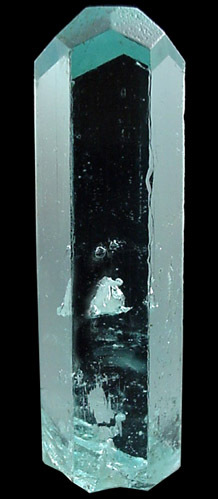

Name                                                         Beryl
Formula                     Be3Al2(Si6O18)IMA Formula:Be3Al2Si6O18
Elements                                         tion Rose Lithium
Colours           Colorless, green, blue, yellow, white, pink, etc
Image_url        ['/imagecache/94/6c/03362480014946250884159.jp...
Locations        ['Afghanistan', '\xa0', 'Angola', '\xa0', 'Ant...
Locations_url    ['https://www.mindat.org//loc-30555.html', 'ht...
Name: 10, dtype: object


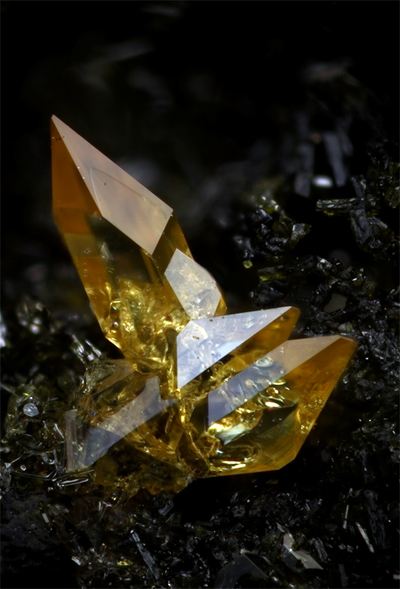

Name                                                      Titanite
Formula            CaTi(SiO4)OOften contains minor Al, Fe3+ and F.
Elements                                                  Bonfim W
Colours          Brown, green, yellow, orange, rose-red, black,...
Image_url        ['/imagecache/48/6b/04856170014985426173586.jp...
Locations        ['Afghanistan', '\xa0', 'Algeria', '\xa0', 'An...
Locations_url    ['https://www.mindat.org//loc-219557.html', 'h...
Name: 83, dtype: object
####### imagesmindatSphene.jpg
Name                                                        Sphene
Formula            CaTi(SiO4)OOften contains minor Al, Fe3+ and F.
Elements                                                  Bonfim W
Colours          Brown, green, yellow, orange, rose-red, black,...
Image_url        ['/imagecache/48/6b/04856170014985426173586.jp...
Locations        ['Afghanistan', '\xa0', 'Algeria', '\xa0', 'An...
Locations_url    ['https://www.mindat.org//loc-219557.html', 'h...
Name: 7

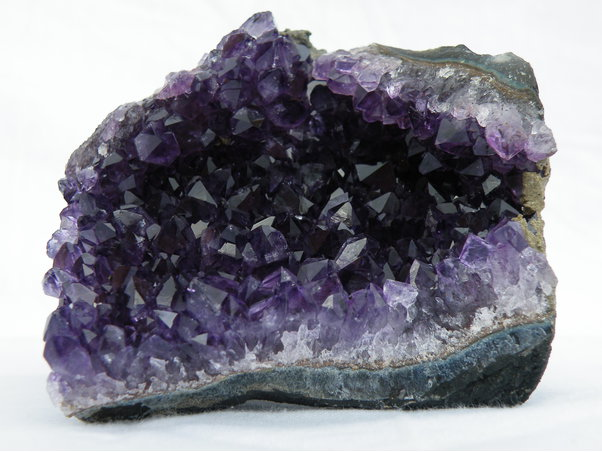

Name                                                      Amethyst
Formula                                                       SiO2
Elements                                                    O, Si 
Colours                                           Violet - purpleC
Image_url        ['/imagecache/8a/ca/03039750014946246163278.jp...
Locations        ['Afghanistan', '\xa0', 'Angola', '\xa0', 'Arg...
Locations_url    ['https://www.mindat.org//loc-404929.html', 'h...
Name: 1, dtype: object
####### imagesmindatSerpentine.jpg
Name                                                    Serpentine
Formula                                                 D3[Si2O5](
Elements         Sn–W–Pb–Ag–Zn Huanuni Deposit, Bolivia. Minera...
Colours                                                        NaN
Image_url        ['/imagecache/52/39/02561330015621700494145.jp...
Locations        ['Afghanistan', '\xa0', 'Albania', '\xa0', 'Al...
Locations_url    ['https://www.mindat.org//loc-186000.html', 'h...
Name

Name                                                    Aquamarine
Formula                                               Be3Al2Si6O18
Elements                                            Al, Be, O, Si 
Colours                                           BlueStreak:White
Image_url        ['/imagecache/94/6c/03362480014946250884159.jp...
Locations        ['Afghanistan', '\xa0', 'Argentina', '\xa0', '...
Locations_url    ['https://www.mindat.org//loc-259495.html', 'h...
Name: 7, dtype: object


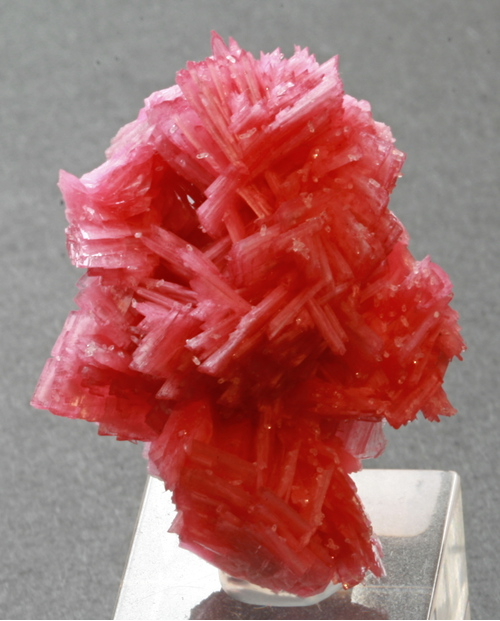

Name                                                     Rhodonite
Formula          CaMn3Mn[Si5O15]Often contains minor Mg and Fe....
Elements                                            Ca, Mn, O, Si 
Colours                              Red, pink, brownish-red, gray
Image_url        ['/imagecache/81/52/03249100014946417158526.jp...
Locations        ['Algeria', '\xa0', 'Antarctica', '\xa0', 'Arg...
Locations_url    ['https://www.mindat.org//loc-241079.html', 'h...
Name: 66, dtype: object
####### imagesmindatMorganite.jpg
Name                                                     Morganite
Formula                                             Be3Al2(Si6O18)
Elements                                            Al, Be, O, Si 
Colours                                                        NaN
Image_url        ['/imagecache/9a/f5/00763230015257047241235.jp...
Locations        ['Afghanistan', '\xa0', 'Argentina', '\xa0', '...
Locations_url    ['https://www.mindat.org//loc-5564.html', 'htt...
Name

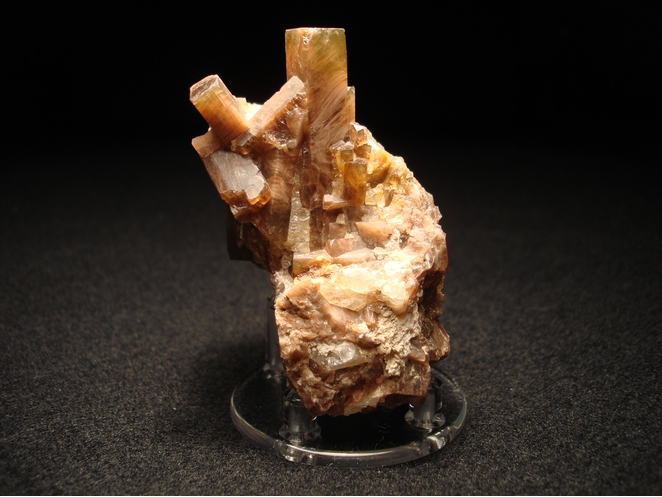

Name                                                    Andalusite
Formula                              Al2(SiO4)OIMA Formula:Al2SiO5
Elements                                                  Bonfim W
Colours          Pink to red brown, occasionally yellow, green,...
Image_url        ['/imagecache/ff/30/01398870014946330614953.jp...
Locations        ['Andorra', '\xa0', 'Antarctica', 'AmMin 36:36...
Locations_url    ['https://www.mindat.org//loc-31239.html', 'ht...
Name: 4, dtype: object
####### imagesmindatZoisite.jpg
Name                                                       Zoisite
Formula                                   Ca2Al3[Si2O7][SiO4]O(OH)
Elements                                                  Bonfim W
Colours          Colourless, purple, greyish-white, grey, yello...
Image_url        ['/imagecache/ce/e7/04096150014946273104080.jp...
Locations        ['Afghanistan', '\xa0', 'Antarctica', 'AmMin 3...
Locations_url    ['https://www.mindat.org//loc-8.html', 'https:...
Name: 9

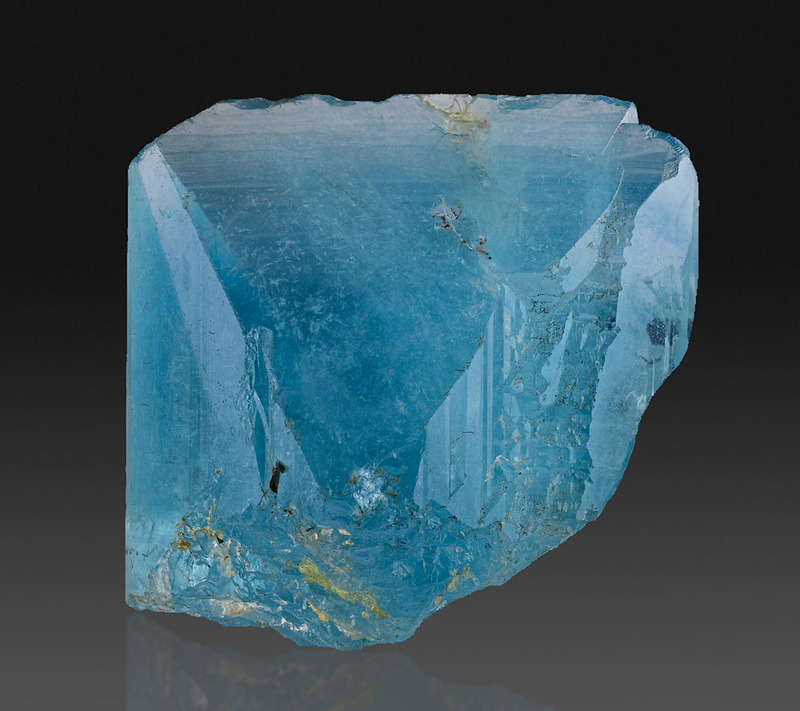

Name                                                         Topaz
Formula                      Al2(SiO4)(F,OH)2IMA Formula:Al2SiO4F2
Elements                                          Al, F, H, O, Si 
Colours          Colourless, white, pale blue, light green, yel...
Image_url        ['/imagecache/28/ea/01019470014946281573165.jp...
Locations        ['Afghanistan', '\xa0', 'Algeria', '\xa0', 'An...
Locations_url    ['https://www.mindat.org//loc-226670.html', 'h...
Name: 84, dtype: object


Name                                                       Citrine
Formula                                                       SiO2
Elements                                                    O, Si 
Colours                                           Yellow - OrangeC
Image_url        ['/imagecache/49/16/06583880014946260058468.jp...
Locations        ['Angola', '\xa0', 'Argentina', '\xa0', 'Austr...
Locations_url    ['https://www.mindat.org//loc-106778.html', 'h...
Name: 22, dtype: object


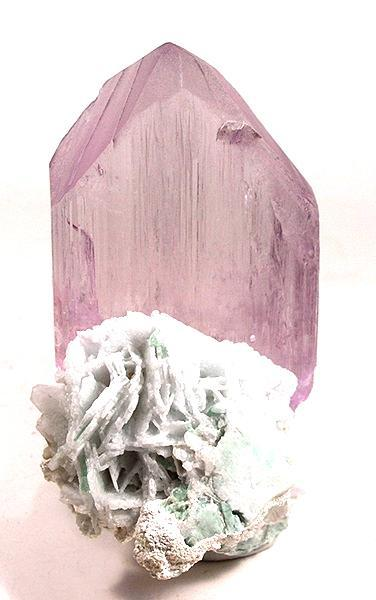

Name                                                     Spodumene
Formula                                                  LiAlSi2O6
Elements                                         tion Rose Lithium
Colours          Colourless, yellow, light green, emerald-green...
Image_url        ['/imagecache/ce/ac/04688640014946246204375.jp...
Locations        ['Afghanistan', '\xa0', 'Angola', '\xa0', 'Ant...
Locations_url    ['https://www.mindat.org//loc-30555.html', 'ht...
Name: 77, dtype: object


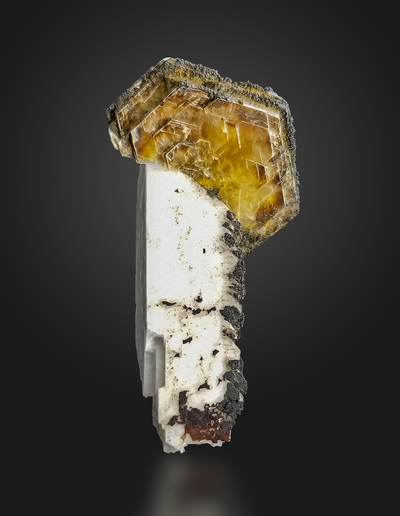

Name                                                    Lepidolite
Formula                                                 KLi2Al(Si4
Elements                                         tion Rose Lithium
Colours          Pink, light purple, light rose red, other colo...
Image_url        ['/imagecache/8e/a3/06859650014946257595118.jp...
Locations        ['Afghanistan', '\xa0', 'Algeria', '\xa0', 'An...
Locations_url    ['https://www.mindat.org//loc-290297.html', 'h...
Name: 43, dtype: object


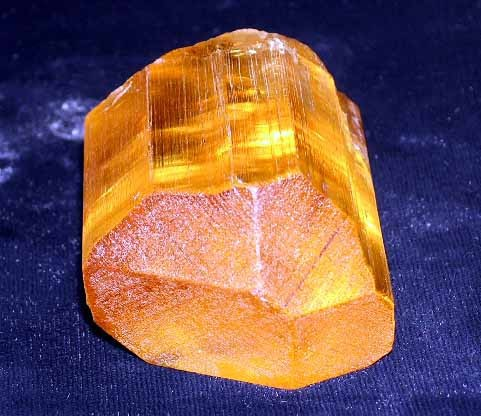

Name                                                     Scapolite
Formula                                                 Na4Al3Si9O
Elements            ite as Genetic Indicators of the Evate Apatite
Colours                                                        NaN
Image_url        ['/imagecache/d3/44/03090300014947808483357.jp...
Locations        ['Afghanistan', '\xa0', 'Algeria', '\xa0', 'An...
Locations_url    ['https://www.mindat.org//loc-227629.html', 'h...
Name: 70, dtype: object


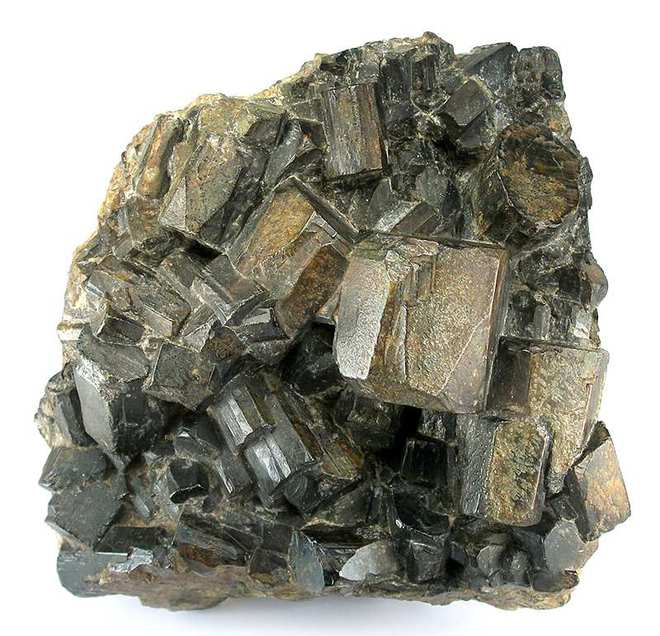

Name                                                    Cordierite
Formula          (Mg,Fe)2Al3(AlSi5O18)Also given as (Mg,Fe)2Al3...
Elements                                                  Bonfim W
Colours          Grey, blue, blue-violet, greenish, yellowish b...
Image_url        ['/imagecache/4a/96/09720090014946932965253.jp...
Locations        ['Afghanistan', '\xa0', 'Algeria', '\xa0', 'An...
Locations_url    ['https://www.mindat.org//loc-253959.html', 'h...
Name: 23, dtype: object


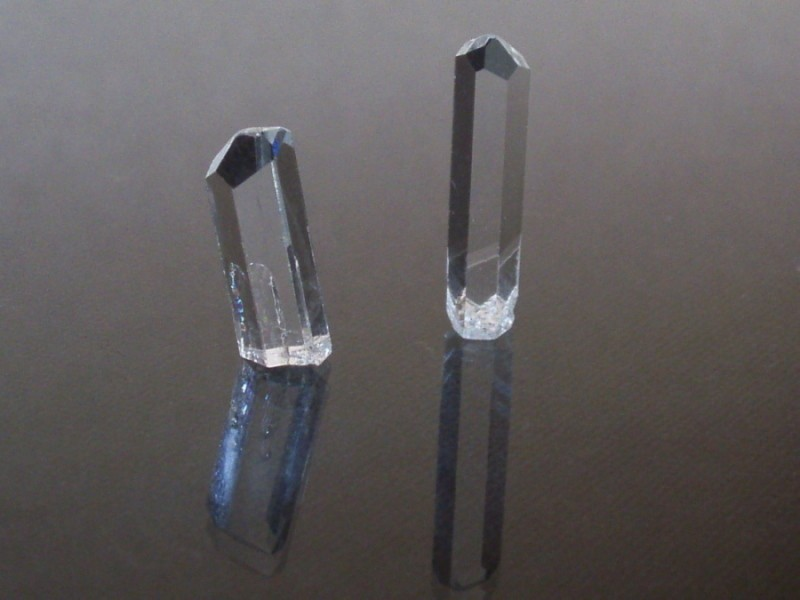

Name                                                     Goshenite
Formula                                             Be3Al2(Si6O18)
Elements                                            Al, Be, O, Si 
Colours                                                 Colourless
Image_url        ['/imagecache/5f/86/02567230014946857608316.jp...
Locations        ['Afghanistan', '\xa0', 'Argentina', '\xa0', '...
Locations_url    ['https://www.mindat.org//loc-5564.html', 'htt...
Name: 13, dtype: object


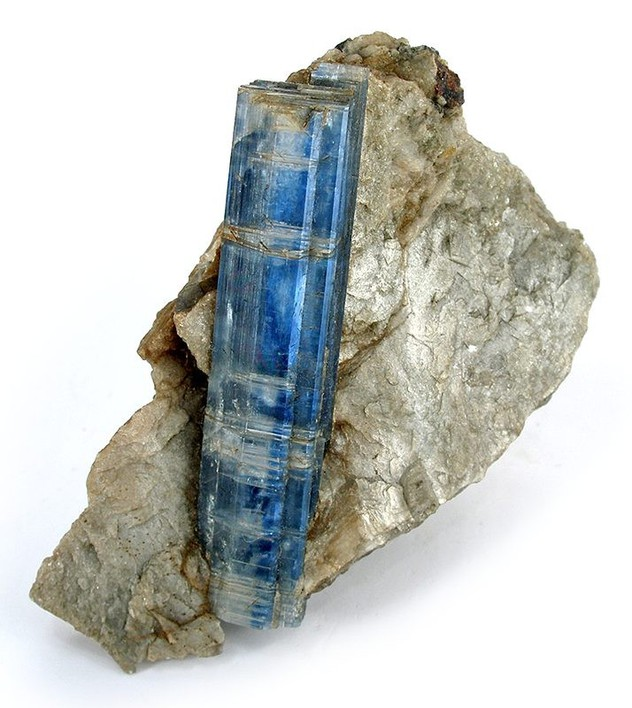

Name                                                       Kyanite
Formula                             Al2(SiO4)OIMA Formula:Al2OSiO4
Elements         ralogy", 12th Ed. (1900).\nUlster\nDonegal Cou...
Colours          Blue, white, light gray, green, rarely yellow,...
Image_url        ['/imagecache/4b/57/05313640014946251682728.jp...
Locations        ['Afghanistan', '\xa0', 'Antarctica', 'AmMin 3...
Locations_url    ['https://www.mindat.org//loc-5577.html', 'htt...
Name: 40, dtype: object


Name                                                     Turquoise
Formula                                    CuAl6(PO4)4(OH)8 · 4H2O
Elements                                          Al, Cu, H, O, P 
Colours          bright blue, sky-blue, pale green, blue-green,...
Image_url        ['/imagecache/6d/d1/05330790014956573955192.jp...
Locations        ['Afghanistan', 'Gübelin, E., Wolgensinger, M....
Locations_url    ['https://www.mindat.org/loc-14319.html', 'htt...
Name: 86, dtype: object
####### imagesmindatSodalite.jpg
Name                                                      Sodalite
Formula          Na4(Si3Al3)O12ClSome K substitutes for Na in t...
Elements                                                        Al
Colours          All ColoursComment:Colourless, white, light ye...
Image_url        ['/imagecache/43/d7/05455650014977380944859.jp...
Locations        ['Afghanistan', '\xa0', 'Angola', '\xa0', 'Ant...
Locations_url    ['https://www.mindat.org//loc-6990.html', 'htt...
Name:

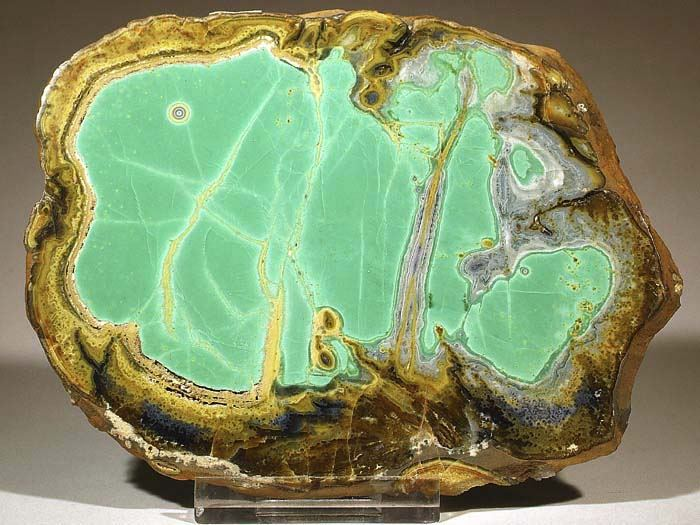

Name                                                     Variscite
Formula                     AlPO4 · 2H2OIMA Formula:Al(PO4) · 2H2O
Elements         Sn–W–Pb–Ag–Zn Huanuni Deposit, Bolivia. Minera...
Colours          Pale to emerald-green, bluish green, colourles...
Image_url        ['/imagecache/77/23/08123090014977192376273.jp...
Locations        ['Antigua and Barbuda', '\xa0', 'Argentina', '...
Locations_url    ['https://www.mindat.org//loc-147083.html', 'h...
Name: 88, dtype: object


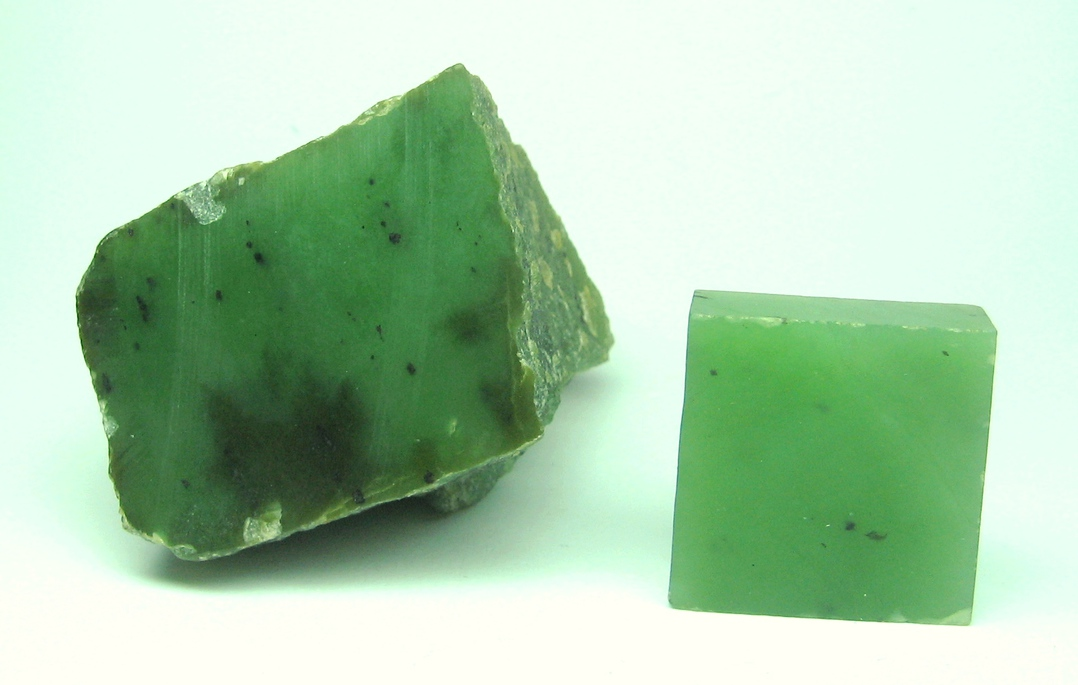

Name                                                      Nephrite
Formula                                                        NaN
Elements                                                       NaN
Colours                                                        NaN
Image_url        ['/imagecache/9a/66/04209570014946693579254.jp...
Locations        ['Afghanistan', '\xa0', 'Australia', '\xa0', '...
Locations_url    ['https://www.mindat.org//loc-404173.html', 'h...
Name: 49, dtype: object


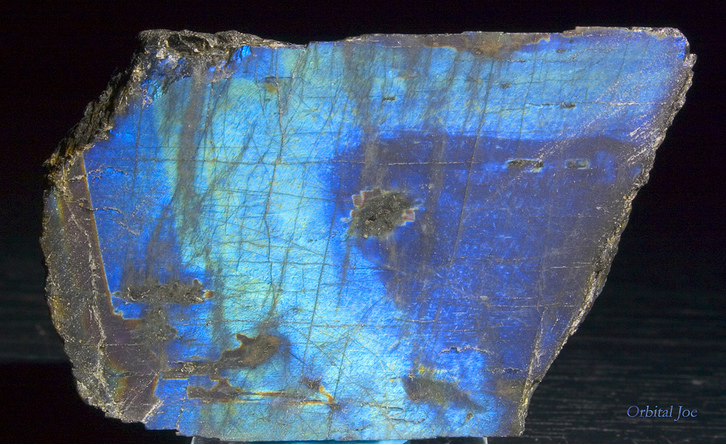

Name                                                   Labradorite
Formula                                    (Ca,Na)[Al(Al,Si)Si2O8]
Elements         ralogy", 12th Ed. (1900)\nLarne\n  ⓘ Scawt Hil...
Colours                                           Pale green, blue
Image_url        ['/imagecache/ec/63/05484420014946246705608.jp...
Locations        ['Africa', '\xa0', 'Algeria', '\xa0', 'Angola'...
Locations_url    ['https://www.mindat.org//loc-406274.html', 'h...
Name: 41, dtype: object
####### imagesmindatChrysoberyl.jpg
Name                                                   Chrysoberyl
Formula                                                    BeAl2O4
Elements                                                Al, Be, O 
Colours          Green shades, emerald-green, greenish white, y...
Image_url        ['/imagecache/cb/29/01546300014949462962248.jp...
Locations        ['Afghanistan', '\xa0', 'Algeria', '\xa0', 'An...
Locations_url    ['https://www.mindat.org//loc-6990.html', 'htt...
Na

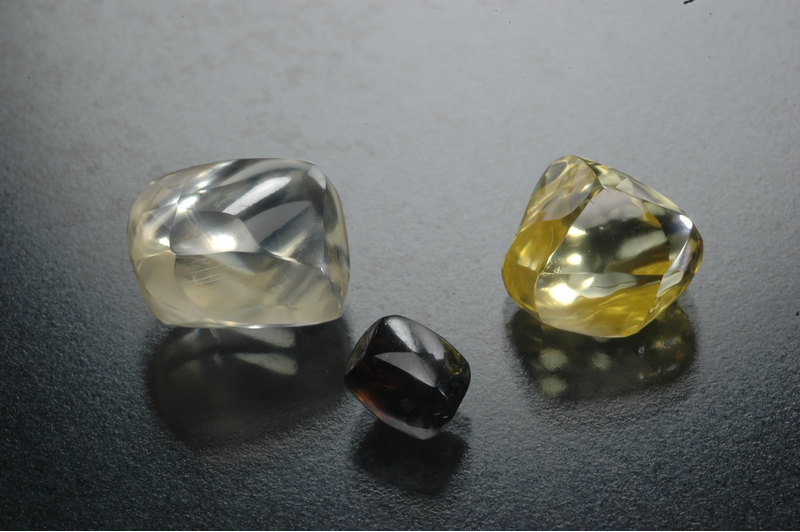

Name                                                       Diamond
Formula                                                          C
Elements                                                        C 
Colours          Colourless, yellowish to yellow, brown, black,...
Image_url        ['/imagecache/47/97/00866020014967655436423.jp...
Locations        ['Algeria', '\xa0', 'Angola', '\xa0', 'Antarct...
Locations_url    ['https://www.mindat.org//loc-266062.html', 'h...
Name: 24, dtype: object


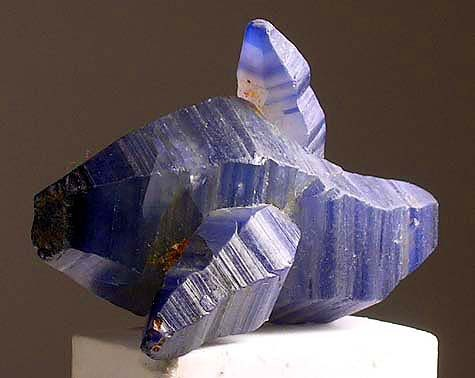

Name                                                      Sapphire
Formula                                                      Al2O3
Elements                                                    Al, O 
Colours                                                        NaN
Image_url        ['/imagecache/11/3b/05249310014946376316370.jp...
Locations        ['Afghanistan', '\xa0', 'Antarctica', 'AmMin 3...
Locations_url    ['https://www.mindat.org//loc-227636.html', 'h...
Name: 69, dtype: object


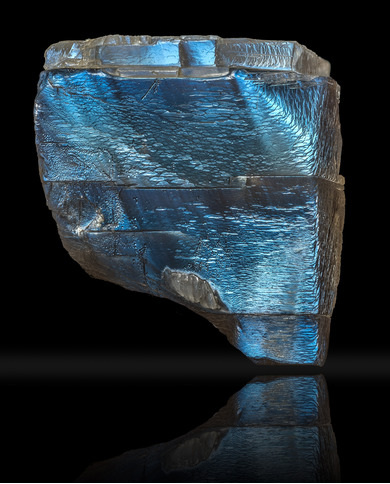

Name                                                     Moonstone
Formula                                                        NaN
Elements                                                       NaN
Colours                                                        NaN
Image_url        ['/imagecache/f9/d7/03275250014946353858645.jp...
Locations        ['Australia', 'Gübelin, E. and Wolgensinger, M...
Locations_url    ['https://www.mindat.org/loc-151.html', 'https...
Name: 47, dtype: object
####### imagesmindatRuby.jpg
Name                                                          Ruby
Formula                                                      Al2O3
Elements                                                    Al, O 
Colours          RedComment:The substitution of Al3+ by Cr3+ re...
Image_url        ['/imagecache/4d/54/07390640015047610029747.jp...
Locations        ['Afghanistan', 'Gübelin, E., Wolgensinger, M....
Locations_url    ['https://www.mindat.org/loc-14319.html', 'htt...
Name: 68,

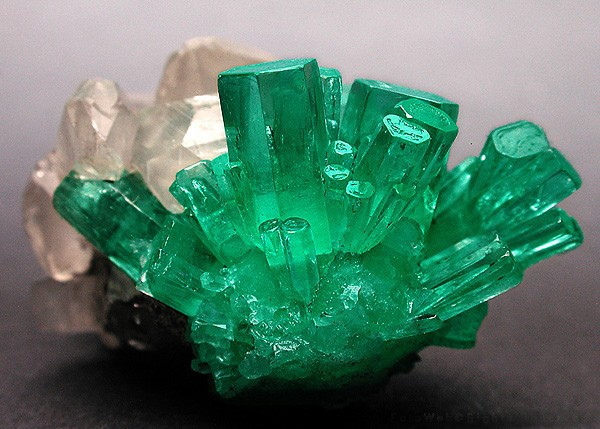

Name                                                       Emerald
Formula                                             Be3Al2(Si6O18)
Elements                                            Al, Be, O, Si 
Colours                                                        NaN
Image_url        ['/imagecache/5e/f8/04122650014946250952182.jp...
Locations        ['Afghanistan', '\xa0', 'Argentina', '\xa0', '...
Locations_url    ['https://www.mindat.org//loc-156233.html', 'h...
Name: 12, dtype: object


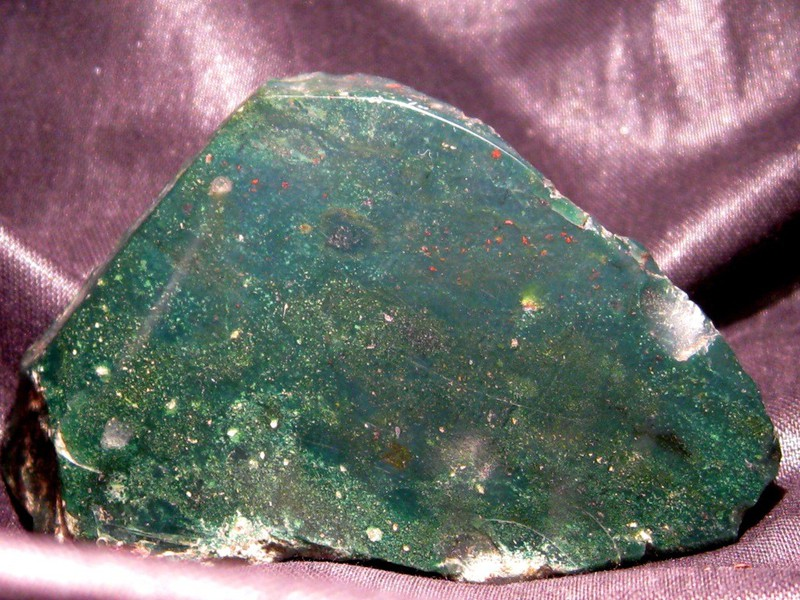

Name                                                    Bloodstone
Formula                                                       SiO2
Elements                                                    O, Si 
Colours                                                        NaN
Image_url        ['/imagecache/79/71/07929300014977252165352.jp...
Locations        ['Australia', 'Mason, A. (1976) The world of R...
Locations_url    ['https://www.mindat.org/loc-151.html', 'https...
Name: 18, dtype: object


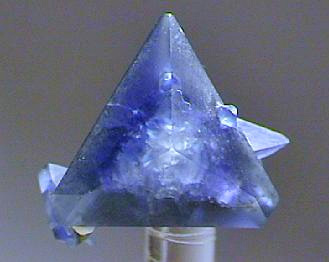

Name                                                     Benitoite
Formula                           BaTi(Si3O9)IMA Formula:BaTiSi3O9
Elements                                            Ba, O, Si, Ti 
Colours          Sapphire blue, white to colorless, pinkHardnes...
Image_url        ['/imagecache/f0/95/00031680014946244253453.jp...
Locations        ['Australia', '\xa0', 'Czech Republic', '\xa0'...
Locations_url    ['https://www.mindat.org//loc-72.html', 'https...
Name: 17, dtype: object


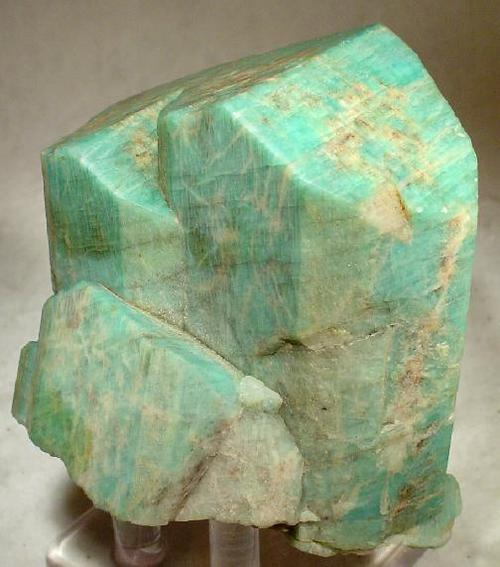

Name                                                     Amazonite
Formula                                                 K(AlSi3O8)
Elements                                             Al, K, O, Si 
Colours                                                        NaN
Image_url        ['/imagecache/11/7a/04766080014946246016426.jp...
Locations        ['Argentina', '\xa0', 'Australia', '\xa0', 'Au...
Locations_url    ['https://www.mindat.org//loc-269722.html', 'h...
Name: 0, dtype: object


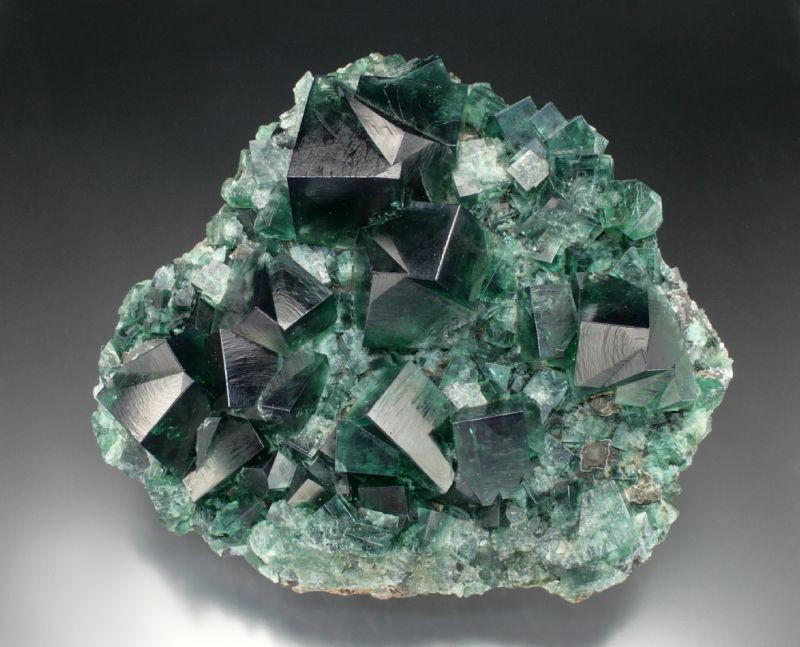

Name                                                      Fluorite
Formula                                                       CaF2
Elements                                                    Ca, F 
Colours          Purple, lilac, golden-yellow, green, colourles...
Image_url        ['/imagecache/8a/aa/03341350014951710589714.jp...
Locations        ['Australia', '\xa0', 'Austria', '\xa0', 'Belg...
Locations_url    ['https://www.mindat.org//loc-186.html', 'http...
Name: 28, dtype: object
####### imagesmindatOpalite.jpg
Name                                                       Opalite
Formula                                                        NaN
Elements                                                       NaN
Colours                                                        NaN
Image_url        ['/imagecache/56/a5/01045060014947136889067.jp...
Locations        ['Australia', '\xa0', 'New Zealand', '\xa0', '...
Locations_url    ['https://www.mindat.org//loc-271527.html', 'h...
Name: 

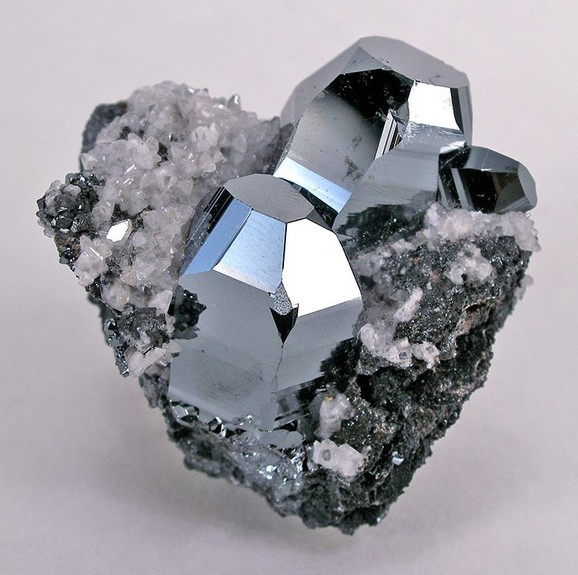

Name                                                      Hematite
Formula                                                      Fe2O3
Elements                                                    Fe, O 
Colours          Steel-grey to black in crystals and massively ...
Image_url        ['/imagecache/f4/8e/03175130014947161979434.jp...
Locations        ['Argentina', '\xa0', 'Austria', '\xa0', 'Chil...
Locations_url    ['https://www.mindat.org//loc-239486.html', 'h...
Name: 34, dtype: object


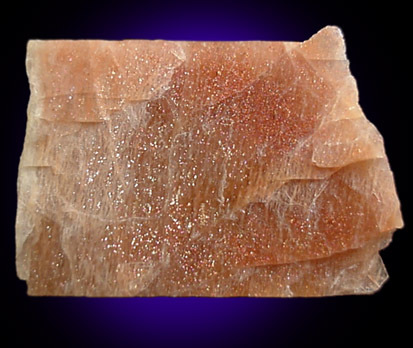

Name                                                      Sunstone
Formula                                                        NaN
Elements                                                       NaN
Colours                                                        NaN
Image_url        ['/imagecache/9c/8f/05889370014946475816061.jp...
Locations        ['Australia', '\xa0', 'Canada', '\xa0', 'India...
Locations_url    ['https://www.mindat.org//loc-43990.html', 'ht...
Name: 79, dtype: object


Name                                                       Peridot
Formula                                                    Mg2SiO4
Elements                                                Mg, O, Si 
Colours                                                        NaN
Image_url        ['/imagecache/88/c3/03031010014950286711279.jp...
Locations        ['Australia', '\xa0', 'Brazil', '\xa0', 'Cambo...
Locations_url    ['https://www.mindat.org//loc-246490.html', 'h...
Name: 53, dtype: object


KeyboardInterrupt: Interrupted by user

In [43]:
X=dataset_df.loc[:,'Latitude':'Longitude']
y = dataset_df['clusters']
X=scale(X)
# print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = tree.DecisionTreeClassifier(max_depth=10,min_samples_split=10)
model =  clf.fit(X_train,y_train)
lat = float(input("Please enter Lat value: "))
long = float(input("Please enter Long value: "))
flag = 0
while (-90 <=lat <= 90 and -180 <= long <= 180):
    print('Closest clusters prediction : {:.0f}'.format(model.predict([[lat, long]])[0]))
    print("would you like to get more details? yes = 1, no =0")
    ans = int(input("o or 1?"))
    if(ans==1):
        stone_details(int(model.predict([[lat, long]])[0]))
    dec = int(input("Exit = 0, Continue =1, 0 or 1?"))
    if(dec==0):
        flag = 1
        break
    lat = float(input("Please enter Lat value: "))
    long = float(input("Please enter Long value: "))
    lat = scale(lat)
    long = scale(long)
if(flag==0):
    print('Input is out of range!')
else:
    print("Goodbye!")

32.72247498268717, 35.09698611319979   -> Shefa Yamim Nahal Hakishon Location.

From a little research, Shefa Yamim found stones such as: Diopside, Ruby,Quartz,Zircon, Diamonds

Can we find those stone by givem Shefa Yamim coordinations?
Lets find out...